<a href="https://colab.research.google.com/github/Trantracy/Corona-Virus-analization/blob/master/Corona%20Virus%20with%20Polynomial%20Linear%20Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Novel Corona Virus 2019 Dataset



## Context

From [World Health Organization](https://www.who.int/emergencies/diseases/novel-coronavirus-2019) - On 31 December 2019, WHO was alerted to several cases of pneumonia in Wuhan City, Hubei Province of China. The virus did not match any other known virus. This raised concern because when a virus is new, we do not know how it affects people.

So daily level information on the affected people can give some interesting insights when it is made available to the broader data science community.

[Johns Hopkins University has made an excellent dashboard](https://gisanddata.maps.arcgis.com/apps/opsdashboard/index.html#/bda7594740fd40299423467b48e9ecf6) using the affected cases data.

Data is available as csv files in the [Johns Hopkins Github repository](https://github.com/CSSEGISandData/COVID-19). Please refer to the github repository for the [Terms of Use](https://github.com/CSSEGISandData/COVID-19/blob/master/README.md) details.

## Content

2019 Novel Coronavirus (2019-nCoV) is a virus (more specifically, a coronavirus) identified as the cause of an outbreak of respiratory illness first detected in Wuhan, China.

This dataset has daily level information on the number of affected cases, deaths and recovery from 2019 novel coronavirus. Please note that this is a time series data and so the number of cases on any given day is the cumulative number.

The data is available from 22 Jan, 2020.

## Column Description

Main file in this dataset is `covid_19_data.csv` and the detailed descriptions are below.

`covid_19_data.csv`

-   Sno - Serial number
-   ObservationDate - Date of the observation in MM/DD/YYYY
-   Province/State - Province or state of the observation (Could be empty when missing)
-   Country/Region - Country of observation
-   Last Update - Time in UTC at which the row is updated for the given province or country. (Not standardised and so please clean before using it)
-   Confirmed - Cumulative number of confirmed cases till that date
-   Deaths - Cumulative number of of deaths till that date
-   Recovered - Cumulative number of recovered cases till that date

## Exploratory Data Analysis

### Import libraries and datasets

In [0]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
sns.set()

In [0]:
confirmed = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')
deaths = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv')
recoveries = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv')

### Overview

**Figure out the meaning of columns and rows and how the data is organized.**

In [0]:
# Show the first five rows of confirmed cases
# Your code here
confirmed[confirmed['Country/Region']=='China']

In [0]:
# How many countries or regions have confirmed cases?
# Your code here
print(confirmed['Country/Region'].nunique(), 'countries or regions with reported confirmed cases')

# Save the list of countries or regions into a list
countries = confirmed['Country/Region'].unique()
print(countries)

In [0]:
# How many provinces or states have confirmed cases?
# Noted that we have missing values in this column
# Your code
print(confirmed['Province/State'].nunique() - 1, 'provinces or states with reported confirmed cases')

# Save the list of provinces or states into a list
# Your code here
provinces = confirmed['Province/State'].unique()
print(provinces)

In [0]:
# Get the range of date
# confirmed.columns will give you the list of columns, but it also include 
# Province/State, Country/Region, Lat and Long, we need to move it out
# Your code here
dates = confirmed.columns[4:]
print('The date range starts from ', dates[0], 'to', dates[-1])

**Situation report**

In [0]:
# This is an example
# Get the total number of confirmed cases on the first day
# Your code here
print('Confirmed cases globally:', confirmed[dates[0]].sum(), 'on', dates[0])

In [0]:
# Get the total number of confirmed cases on the latest day
# Your code here
print('Confirmed cases globally:', confirmed[dates[-1]].sum(), 'on', dates[-1])

In [0]:
# Get the total number of deaths on the first day and last day
# Your code here
print('Total deaths globally:', deaths[dates[0]].sum(), 'on', dates[0])
print('Total deaths globally:', deaths[dates[-1]].sum(), 'on', dates[-1])

In [0]:
# Get the total number of recoveries on the first day and last day
# Your code here
print('Total recovered globally:', recoveries[dates[0]].sum(), 'on', dates[0])
print('Total recovered globally:', recoveries[dates[-2]].sum(), 'on', dates[-2])

## Data Visualization

### Number of daily increases

**This is an example**

In [0]:
confirmed[dates].sum().diff()

In [0]:
world_daily_increases = confirmed[dates].sum().diff()

plt.figure(figsize=(10, 5))
plt.bar(range(len(world_daily_increases)), world_daily_increases)
plt.title('# of Daily Increases Over Time', size=20)
plt.xlabel('Days Since 1/22/2020', size=20)
plt.ylabel('# of Cases', size=20)
plt.xticks(size=10)
plt.yticks(size=10)
plt.show()

In [0]:
# Write a function to analyze daily increases 
# of specific country on specific criteria ('confirmed', 'deaths', 'recovered')
# Your code here
def plot_daily_increases(country_name, criteria):
    if criteria not in ['confirmed', 'deaths', 'recovered']:
        print("Sorry we don't have the data about", criteria)
    else:
        if criteria == 'confirmed':
            daily_increases = confirmed[confirmed['Country/Region']==country_name][dates].sum().diff()
        elif criteria == 'deaths':
            daily_increases = deaths[deaths['Country/Region']==country_name][dates].sum().diff()
        else:
            dates_columns_in_recoveries = [date+'20' for date in dates[:-1]]
            daily_increases = recoveries[recoveries['Country/Region']==country_name][dates_columns_in_recoveries].sum().diff()


        plt.figure(figsize=(10, 5))
        plt.bar(range(len(daily_increases)), daily_increases)
        plt.title('# of Daily Increases '+criteria+' Cases in '+ country_name +' Over Time', size=20)
        plt.xlabel('Days Since 1/22/2020', size=20)
        plt.ylabel('# of Cases', size=20)
        plt.xticks(size=10)
        plt.yticks(size=10)
        plt.show()
  

In [0]:
plot_daily_increases('US', 'confirmed')

## Prediction with Linear Regression

In [0]:
confirmed.head(10)

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,3/1/20,3/2/20,3/3/20,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20,3/31/20,4/1/20,4/2/20,4/3/20,4/4/20,4/5/20,4/6/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,4,4,5,7,7,7,11,16,21,22,22,22,24,24,40,40,74,84,94,110,110,120,170,174,237,273,281,299,349,367
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,10,12,23,33,38,42,51,55,59,64,70,76,89,104,123,146,174,186,197,212,223,243,259,277,304,333,361,377
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,3,5,12,12,17,17,19,20,20,20,24,26,37,48,54,60,74,87,90,139,201,230,264,302,367,409,454,511,584,716,847,986,1171,1251,1320,1423
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,2,39,39,53,75,88,113,133,164,188,224,267,308,334,370,376,390,428,439,466,501,525
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2,2,3,3,3,4,4,5,7,7,7,8,8,8,10,14,16
5,NaN,Antigua and Barbuda,17.0608,-61.7964,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,3,3,3,7,7,7,7,7,7,7,9,15,15,15,15
6,NaN,Argentina,-38.4161,-63.6167,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,2,8,12,12,17,19,19,31,34,45,56,68,79,97,128,158,266,301,387,387,502,589,690,745,820,1054,1054,1133,1265,1451,1451,1554
7,NaN,Armenia,40.0691,45.0382,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,4,8,18,26,52,78,84,115,136,160,194,235,249,265,290,329,407,424,482,532,571,663,736,770,822,833
8,Australian Capital Territory,Australia,-35.4735,149.0124,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,2,2,3,4,6,9,19,32,39,39,53,62,71,77,78,80,84,87,91,93,96,96
9,New South Wales,Australia,-33.8688,151.2093,0,0,0,0,3,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,6,6,13,22,22,26,28,38,48,55,65,65,92,112,134,171,210,267,307,353,436,669,669,818,1029,1219,1405,1617,1791,2032,2032,2182,2298,2389,2493,2580,2637


In [0]:
dates

Index(['1/22/20', '1/23/20', '1/24/20', '1/25/20', '1/26/20', '1/27/20',
       '1/28/20', '1/29/20', '1/30/20', '1/31/20', '2/1/20', '2/2/20',
       '2/3/20', '2/4/20', '2/5/20', '2/6/20', '2/7/20', '2/8/20', '2/9/20',
       '2/10/20', '2/11/20', '2/12/20', '2/13/20', '2/14/20', '2/15/20',
       '2/16/20', '2/17/20', '2/18/20', '2/19/20', '2/20/20', '2/21/20',
       '2/22/20', '2/23/20', '2/24/20', '2/25/20', '2/26/20', '2/27/20',
       '2/28/20', '2/29/20', '3/1/20', '3/2/20', '3/3/20', '3/4/20', '3/5/20',
       '3/6/20', '3/7/20', '3/8/20', '3/9/20', '3/10/20', '3/11/20', '3/12/20',
       '3/13/20', '3/14/20', '3/15/20', '3/16/20', '3/17/20', '3/18/20',
       '3/19/20', '3/20/20', '3/21/20', '3/22/20', '3/23/20', '3/24/20',
       '3/25/20', '3/26/20', '3/27/20', '3/28/20', '3/29/20', '3/30/20',
       '3/31/20', '4/1/20', '4/2/20', '4/3/20', '4/4/20', '4/5/20', '4/6/20'],
      dtype='object')

In [0]:
confirmed[dates].sum()

1/22/20        555
1/23/20        654
1/24/20        941
1/25/20       1434
1/26/20       2118
            ...   
4/2/20     1013157
4/3/20     1095917
4/4/20     1197405
4/5/20     1272115
4/6/20     1345048
Length: 76, dtype: int64

In [0]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

# For X_train, we take nature number start from 0 to represent the dates
# Your code here
X_train = np.arange(len(dates)).reshape(-1, 1)

# For y_train, we take the number of confirmed cases globally
# Your code here
y_train = confirmed[dates].sum()

# Transform our data for polynomial regression
# Your code here
poly = PolynomialFeatures(degree = 4)
X_train_poly = poly.fit_transform(X_train)

# Train model with the data
# Your code here
linear_model = LinearRegression()
linear_model.fit(X_train_poly, y_train)

# For forecasting and visualizing, we create X_test which is X_train + 10 more days
# Your code here
X_test = np.arange(len(dates) + 10).reshape(-1, 1)
X_test_poly = poly.transform(X_test)

# Transform with PolynomialFeatures to have the same shape with X_train_poly
# Your code here

# Forecasting
predictions = linear_model.predict(X_test_poly)

In [0]:
# It's quite scary, right? We hope we are wrong

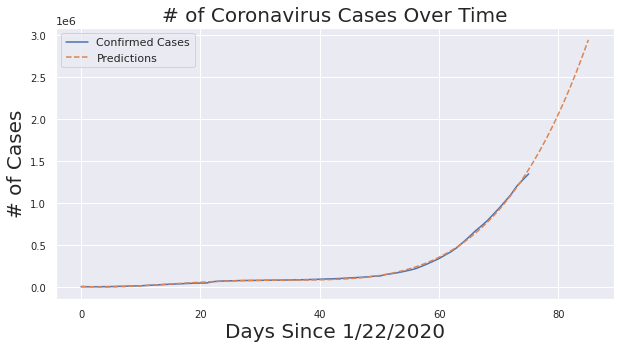

In [0]:
# Visualize the predictions

plt.figure(figsize=(10, 5))

plt.plot(X_train, y_train)
plt.plot(X_test, predictions, linestyle='dashed')

plt.title('# of Coronavirus Cases Over Time', size=20)
plt.xlabel('Days Since 1/22/2020', size=20)
plt.ylabel('# of Cases', size=20)
plt.legend(['Confirmed Cases', 'Predictions'])
plt.xticks(size=10)
plt.yticks(size=10)
plt.show()

**Great job!**